In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.optimizers import SGD
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
np.random.seed(2)
data=np.random.multivariate_normal([0,0],[[1,0],[0,1]],200)
A_data=np.random.multivariate_normal([1.5,1.5],[[2,0],[0,0.5]],1000)
A_label=np.ones(1000)
B_data=np.random.multivariate_normal([0,0],[[1.5,0],[0,3]],1000)
B_label=np.zeros(1000)
train_data=np.concatenate((A_data[0:800,:],B_data[0:800,:]),axis=0)
train_label=np.concatenate((A_label[0:800],B_label[0:800]))
test_data=np.concatenate((A_data[800:1000,:],B_data[800:1000,:]),axis=0)
test_label=np.concatenate((A_label[800:1000],B_label[800:1000]))
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(1600, 2)
(400, 2)
(1600,)
(400,)


In [3]:
# define the keras model
model = Sequential()
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.cast instead.
Train: 82.812, Test: 82.000


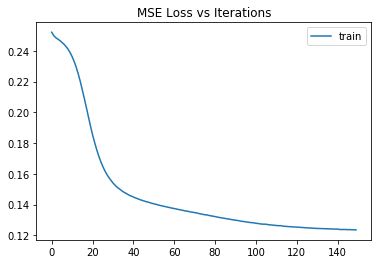

In [4]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, train_label,epochs=150, verbose=0)
_, train_acc = model.evaluate(train_data, train_label, verbose=0)
_, test_acc = model.evaluate(test_data, test_label, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))
pyplot.title('MSE Loss vs Iterations')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

Train: 50.000, Test: 50.000


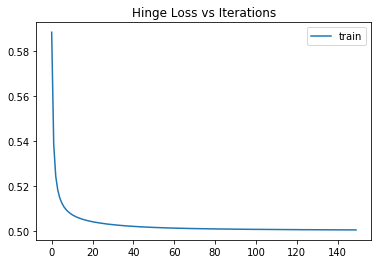

In [5]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge',optimizer=opt, metrics=['accuracy'])
# model.fit(train_data, train_label, epochs=100)
history = model.fit(train_data, train_label,epochs=150, verbose=0)
_, train_acc = model.evaluate(train_data, train_label, verbose=0)
_, test_acc = model.evaluate(test_data, test_label, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))
pyplot.title('Hinge Loss vs Iterations')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()